### Data Analysis
**Data cleaning, formatting, transformation and visualization.**

Autor: DianaHer 

**Script reutilizable para el análisis mensual de ventas**

*Este análisis ha sido diseñado para ser reutilizado cada mes, con la premisa de recibir un resumen de ventas periódicamente. Su objetivo es identificar fortalezas y áreas de oportunidad en tres aspectos clave: productos, regiones de venta y desempeño del equipo de ventas.*

In [2]:
# PASO 01. Instalación de paquetes

import pandas as pd
import seaborn as sns
import numpy as nmp
import matplotlib as mpl

In [3]:
# PASO 02. Importación de archivos.
# Realizar una visualización previa del archivo csv para corregir potenciales errores de importación.

df_sellers = pd.read_csv("C:\\Users\\Usuario\\OneDrive\\Documentos\\Python\\Curso Udemy Análisis de Datos con Pandas y Python\\datasets\\ventasTotales.csv", sep = ';', skiprows = 5)   

In [4]:
# PASO 03. Revisión y limpieza de datos.

df_sellers.head()


,Fecha,Vendedor,Región,Artículo,Categoría,Unidades,Ganancia
0,1/1/2016,Steve Ashton,Norte,Medias Femeninas,Vestimenta,6,"18,00"
1,1/1/2016,Trevor Snodgrass,Oeste,Chocolate,Comestibles,8,"3,84"
2,1/1/2016,Sarah Bond,Sur,Gorras,Vestimenta,3,"6,30"
3,1/1/2016,Desmond Delaney,Sur,Sánguche de Queso,Comestibles,9,"14,40"
4,1/1/2016,Desmond Delaney,Este,Chocolate,Comestibles,14,"6,72"


In [5]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha      460 non-null    object
 1   Vendedor   460 non-null    object
 2   Región     460 non-null    object
 3   Artículo   460 non-null    object
 4   Categoría  460 non-null    object
 5   Unidades   460 non-null    int64 
 6   Ganancia   460 non-null    object
dtypes: int64(1), object(6)
memory usage: 25.3+ KB


*El dataset cuenta con 7 columnas con información de las ventas por región, categoría, ganancias, entre otras. Y cuenta con 460 registros.*

In [6]:
# Limpieza del dataset.
# Quitar espacios en blanco, convertir a minúsculas, quitar acentos y caracteres fuera del codigo ASCII

df_sellers.columns = (
    df_sellers.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.normalize('NFKD')
    .str.encode('ascii', errors = 'ignore').str.decode('utf-8'))

df_sellers.head()

,fecha,vendedor,region,articulo,categoria,unidades,ganancia
0,1/1/2016,Steve Ashton,Norte,Medias Femeninas,Vestimenta,6,"18,00"
1,1/1/2016,Trevor Snodgrass,Oeste,Chocolate,Comestibles,8,"3,84"
2,1/1/2016,Sarah Bond,Sur,Gorras,Vestimenta,3,"6,30"
3,1/1/2016,Desmond Delaney,Sur,Sánguche de Queso,Comestibles,9,"14,40"
4,1/1/2016,Desmond Delaney,Este,Chocolate,Comestibles,14,"6,72"


In [7]:
# Verificar si existen registros duplicados

duplicated = df_sellers[df_sellers.duplicated()]
print(duplicated)

       fecha         vendedor region   articulo   categoria  unidades ganancia
82  6/1/2016  Desmond Delaney    Sur  Sandalias  Vestimenta        15   157,50


In [8]:
# Eliminar registros duplicados

df_sellers_clean = df_sellers.drop_duplicates()
df_sellers_clean.info() # Revisar que el valor ya fue eliminado

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, 0 to 459
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   fecha      459 non-null    object
 1   vendedor   459 non-null    object
 2   region     459 non-null    object
 3   articulo   459 non-null    object
 4   categoria  459 non-null    object
 5   unidades   459 non-null    int64 
 6   ganancia   459 non-null    object
dtypes: int64(1), object(6)
memory usage: 28.7+ KB


In [9]:
# PASO 04. Realizar cálculos para el análisis de datos.
# Verificar los artículos más vendidos.

df_sc = df_sellers_clean
df_sc.articulo.value_counts()

articulo
Escoba               31
Bufanda              28
Pan                  26
Sánguche de Queso    25
Escobillón           25
Chocolate            25
Detergente           24
Pepinillo            24
Sudadera             24
Lejía                24
Calcetines           23
Gorras               21
Medias Femeninas     20
Shorts               19
Soda                 19
Sandalias            18
Limpiavidrios        18
Bombilla             18
Caramelos            17
Cerveza              17
Trapo Piso           13
Name: count, dtype: int64

*En la previa lista se puede observar el número de ventas por artículo, es fácil apreciar los tres artículos más vendidos: escoba(31), bufanda(28) y pan(26).*

In [10]:
# Reemplazar las comas por puntos para poder converitr la columna de ganancia a valor numérico

df_sc['ganancia'] = df_sc['ganancia'].str.replace(',', '.')
df_sc.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16704\1788844174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sc['ganancia'] = df_sc['ganancia'].str.replace(',', '.')


,fecha,vendedor,region,articulo,categoria,unidades,ganancia
0,1/1/2016,Steve Ashton,Norte,Medias Femeninas,Vestimenta,6,18.00
1,1/1/2016,Trevor Snodgrass,Oeste,Chocolate,Comestibles,8,3.84
2,1/1/2016,Sarah Bond,Sur,Gorras,Vestimenta,3,6.30
3,1/1/2016,Desmond Delaney,Sur,Sánguche de Queso,Comestibles,9,14.40
4,1/1/2016,Desmond Delaney,Este,Chocolate,Comestibles,14,6.72


In [11]:
# Cambiar el formato de la columna ganancia

df_sc['ganancia'] = pd.to_numeric(df_sc['ganancia'])
df_sc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, 0 to 459
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fecha      459 non-null    object 
 1   vendedor   459 non-null    object 
 2   region     459 non-null    object 
 3   articulo   459 non-null    object 
 4   categoria  459 non-null    object 
 5   unidades   459 non-null    int64  
 6   ganancia   459 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 28.7+ KB


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16704\1142648904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sc['ganancia'] = pd.to_numeric(df_sc['ganancia'])


In [12]:
df_sc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, 0 to 459
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fecha      459 non-null    object 
 1   vendedor   459 non-null    object 
 2   region     459 non-null    object 
 3   articulo   459 non-null    object 
 4   categoria  459 non-null    object 
 5   unidades   459 non-null    int64  
 6   ganancia   459 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 28.7+ KB


In [13]:
# Verificar que artículo genera más ganancia

totales_artículos = df_sc.groupby('articulo')['ganancia'].sum()

totales_artículos = totales_artículos.sort_values(ascending = False)

# Convertirlo a df haciendo reset del índice

totales_artículos = totales_artículos.reset_index()
totales_artículos

,articulo,ganancia
0,Sandalias,1554.00
1,Sudadera,876.00
2,Escoba,835.85
3,Lejía,666.50
4,Bufanda,616.00
5,Shorts,558.60
6,Medias Femeninas,525.00
7,Detergente,448.88
8,Calcetines,405.00
9,Gorras,327.60


In [14]:
# Seleccionar solo los 5 artículos con mayores ganancias

top5_artículos = totales_artículos.head(5)
top5_artículos

,articulo,ganancia
0,Sandalias,1554.00
1,Sudadera,876.00
2,Escoba,835.85
3,Lejía,666.50
4,Bufanda,616.00


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16704\1931435551.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top5_artículos['articulo'], rotation=90)


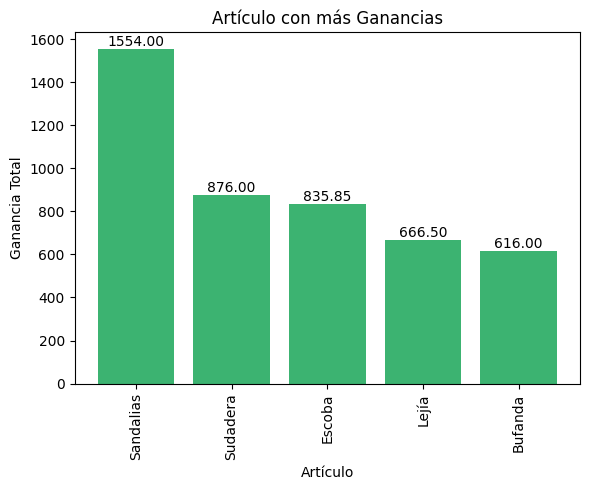

In [15]:
# Realizar un gráfico representativo para los primeros tres artículos, así como para el total de las ganancias por artículo.

#Instalar pypilot para mejor manejo de los atributos del gráfico

import matplotlib.pyplot as plt

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6, 5))

# Definir tipo y componentes del gráfico
ax.bar(top5_artículos['articulo'], top5_artículos['ganancia'])

# Añadir etiquetas de valor en la cima de cada barra
for i, valor in enumerate(top5_artículos['ganancia']):
    ax.text(i, valor, f'{valor:.2f}', ha='center', va='bottom')  # Formato con 2 decimales

# Personalizar etiquetas y título
ax.set_xlabel('Artículo')
ax.set_ylabel('Ganancia Total')
ax.set_title('Artículo con más Ganancias')
ax.set_xticklabels(top5_artículos['articulo'], rotation=90)
ax.bar(top5_artículos['articulo'], top5_artículos['ganancia'], color='mediumseagreen')

 #Ajustar y mostrar gráfico
plt.tight_layout()  
plt.show()

*Podemos observar como es que los artículos que más se venden, no son necesariamente los que generan más ganancia, debido al precio unitario por artículo los que generan mayor ganancia son: sandalias, sudadera y escoba*

In [16]:
# Determinar el total de ganancias según la categoría
totales_categoria = df_sc.groupby('categoria')['ganancia'].sum()

totales_categoria = totales_categoria.sort_values(ascending = False)

totales_categoria = totales_categoria.reset_index()

totales_categoria


,categoria,ganancia
0,Vestimenta,4862.20
1,Hogar,2398.36
2,Comestibles,794.22


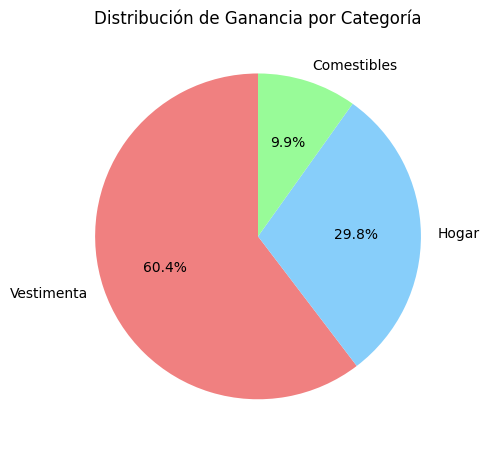

In [17]:
# Realizar un gráfico circular representativo

# Crear el gráfico circular
plt.figure(figsize=(5,5))

# Personalizar atributos del gráfico
plt.pie(totales_categoria['ganancia'], labels=totales_categoria['categoria'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'palegreen'])
plt.title('Distribución de Ganancia por Categoría')

# Ajustar y mostrar
plt.tight_layout()
plt.show()


In [18]:
# Mostrar solo los valores de ventas totales para cada vendedor

totales_vendedor = df_sc.groupby('vendedor')['ganancia'].sum()

totales_vendedor = totales_vendedor.sort_values(ascending = False)

totales_vendedor = totales_vendedor.reset_index()
totales_vendedor



,vendedor,ganancia
0,Dustin Gee,1671.53
1,Steve Ashton,1393.14
2,Trevor Snodgrass,1344.09
3,Boris Stanford,1262.90
4,Desmond Delaney,1227.08
5,Sarah Bond,1156.04


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16704\1727837168.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(totales_vendedor['vendedor'], rotation=90)


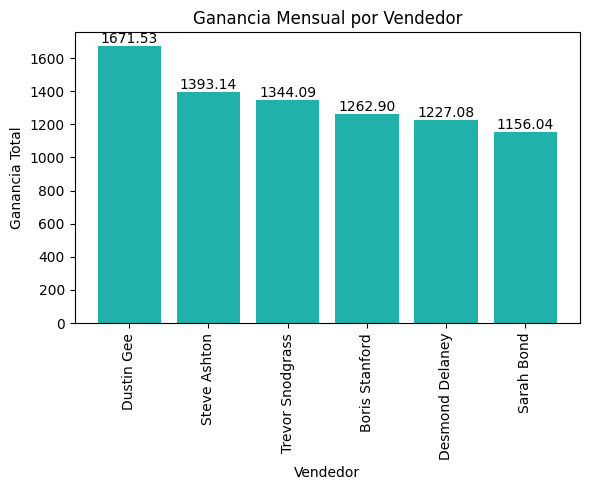

In [19]:
#Crear gráfico representativo con el vendedor que ha generado más ganancias en el mes

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6, 5))

# Definir tipo y componentes del gráfico
ax.bar(totales_vendedor['vendedor'], totales_vendedor['ganancia'])

# Añadir etiquetas de valor en la cima de cada barra
for i, valor in enumerate(totales_vendedor['ganancia']):
    ax.text(i, valor, f'{valor:.2f}', ha='center', va='bottom')  # Formato con 2 decimales

# Ajustar etiquetas y título
ax.set_xlabel('Vendedor')
ax.set_ylabel('Ganancia Total')
ax.set_title('Ganancia Mensual por Vendedor')
ax.set_xticklabels(totales_vendedor['vendedor'], rotation=90)
ax.bar(totales_vendedor['vendedor'], totales_vendedor['ganancia'], color='lightseagreen')

# Ajustar y mostrar el gráfico
plt.tight_layout()  
plt.show()

*El vendedor con mayor ganancia en ventas del mes es Dustin Gee, mientras que el vendedor con menor ganancia es Sarah Bond.*

In [20]:
# Calcular en que región se generan más ganancias

ventas_región = df_sc.groupby('region')['ganancia'].sum()
ventas_región.sort_values(ascending = False)
ventas_región = ventas_región.reset_index()
ventas_región


,region,ganancia
0,Este,2351.82
1,Norte,1731.83
2,Oeste,1934.72
3,Sur,2036.41


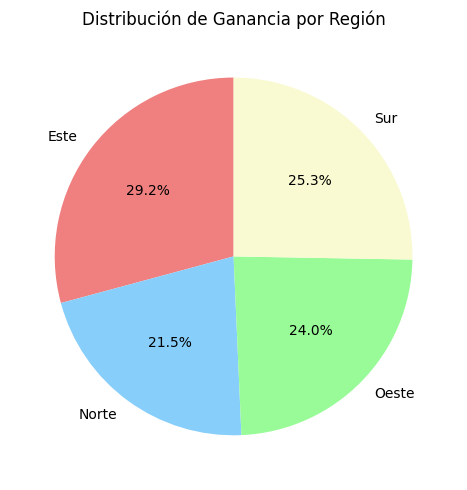

In [21]:
# Realizar un gráfico circular para visualizar los porcentajes de ventas

plt.figure(figsize=(5,5))

plt.pie(ventas_región['ganancia'], labels=ventas_región['region'], autopct='%1.1f%%', startangle=90, colors= ['lightcoral', 'lightskyblue', 'palegreen', 'lightgoldenrodyellow'])
plt.title('Distribución de Ganancia por Región')

plt.tight_layout()
plt.show()

*Podemos observar como la distribución de las ganancias no representa valores mayores o menores extremos para ninguna de las regiones. Sin embargo las ganancias son ligeramente mayores en la región del Este con un 29.2% en total*

<div class="alert alert-info">
<b>Nota:</b> Reemplazar el archivo .csv para realizar el próximo análisis de ventas mensual.
</div>
